In [25]:

#计算墒
def calcShannonEnt(dataSet):
    
    #样本个数
    numEntries = len(dataSet);

    labelCounts = {}
    #遍历样本集合
    for featVec in dataSet:
        #当前样本的类别
        currentLabel = featVec[-1]
        #如果样本dic中没有当前类别，就新增
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1

    #根据墒计算公式，计算当前样本集合的所属类别墒
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt-=prob*log(prob,2)

    return shannonEnt



#生成数据集
def createDataSet():
    dataSet = [[1,1,'yes'],
               [1,1,'yes'],
               [1,0,'no'],
               [0,1,'no'],
               [0,1,'no']
               ]
    #特征的label，特征的含义
    labels = ['no surfacing','flippers']
    return  dataSet,labels



In [31]:
myDat,labels  = createDataSet()
calcShannonEnt(myDat)

0.9709505944546686

In [32]:
myDat[0][-1]='maybe'
calcShannonEnt(myDat)

1.3709505944546687

In [33]:
#根据特征的数值，切分样本集合，axis是要用的特征的index，value是改特征的一个取值
def splitDataSet(dataSet,axis,value):
    #切分后的list，保存的是切分后的子list
    resDataSet = []
    #取出每个样本
    for featVec in dataSet:
        #如果该样本的特征取值=当前value，切分出来
        if featVec[axis] == value:
            #这下面2行的含义是，过滤掉当前特征列
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            #append，使得结果list保存了各个子list
            resDataSet.append(reducedFeatVec)
            
    return resDataSet

In [43]:
def chooseBestFeatureToSplit(dataSet):
    #特征个数
    numFeatures = len(dataSet[0])-1
    #初始样本类别墒
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    
    featInfoGain = {}
    #保存在当前迭代，最优特征的index
    bestFeature = -1
    #分别计算每个feature的墒
    for i in range(numFeatures):
        #拿出来第i个特征的list
        featList = [example[i] for example in dataSet]
        #去重
        uniqueVals = set(featList)
        newEntropy = 0.0
        #遍历当前特征的每个取值，计算出在该值下的墒
        for value in uniqueVals:
            #根据当前特征的取值，切分数据集
            subDataSet = splitDataSet(dataSet,i,value)
            #计算特征在该值下的墒
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob*calcShannonEnt(subDataSet)
        #求出特征在该值下的信息增益
        infoGain = baseEntropy - newEntropy
        featInfoGain[i] = infoGain
        #保证取得信息增益最大的
        if(infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    
    return bestFeature
            

In [44]:
featInfoGainDict = chooseBestFeatureToSplit(myDat)

In [45]:
featInfoGainDict

0

In [51]:
#取出某个属性，最多的那个所属类
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount:
            classCount[vote]=0
        classCount[vote]+=1
    sortedClassCount = sorted(classCount.items(),key=lambda item:item[1],reverse=True)
    return sortedClassCount[0][0]

In [52]:
majorityCnt(['yes','yes','no'])

'yes'

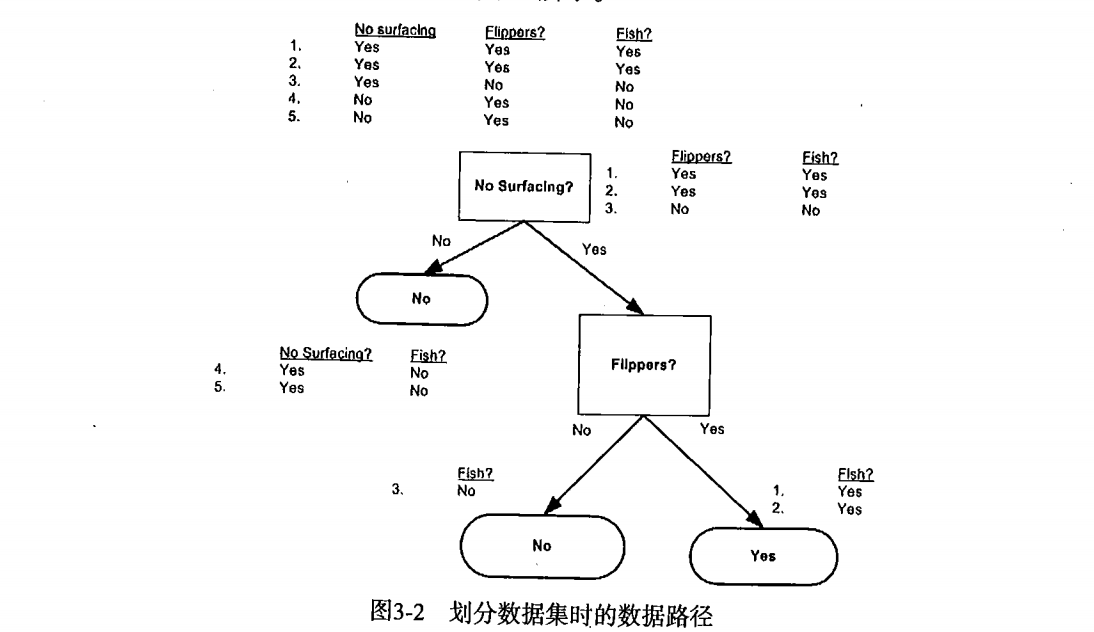


In [56]:
def createTree(dataSet,labels):
    #当前样本集下类别list
    classList = [example[-1] for example in dataSet]
    #由于每次选出最优属性后，样本子集合就不再含有那个属性了
    #如果类别一致，不用再划分
    if len(classList) == classList.count(classList[0]):
        return classList[0]
    #如果只有类别，属性没有了，也不用再划分
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    
    #最优属性的index
    bestFeat = chooseBestFeatureToSplit(dataSet)
    #最优属性的含义
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    
    del(labels[bestFeat])
    #最优属性的取值
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    #根据最优属性取值，划分成对应数量的子集合/子树
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
        
    return myTree

In [57]:
createTree(myDat,labels)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'maybe'}}}}

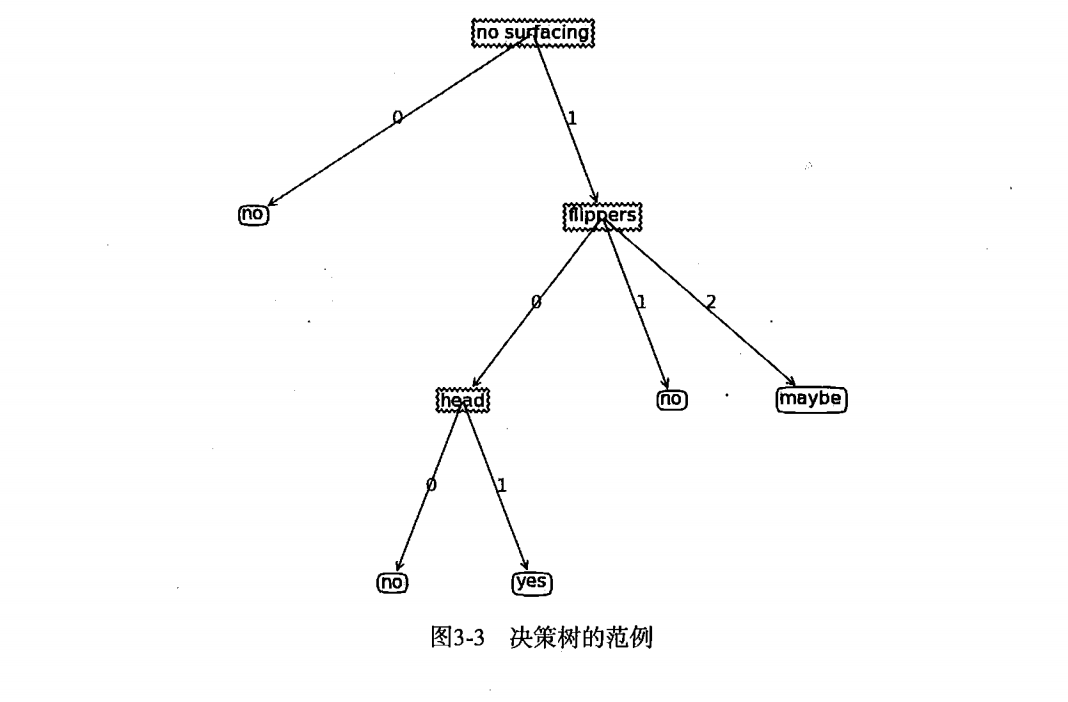